# Decision Trees using Iris Dataset

## The Iris Dataset

You are working for a startup that just got funded to create a smartphone app that automatically identifies species of flowers from pictures taken on the smartphone. We're working with a moderately-sized team of data scientists and will be building part of the data analysis pipeline for this app.

We've been tasked by our company's Head of Data Science to create a demo machine learning model that takes four measurements from the flowers (sepal length, sepal width, petal length, and petal width) and identifies the species based on those measurements alone.

<img src="images/petal_sepal.jpg" />

We've been given a data set from our field researchers to develop the demo, which only includes measurements for three types of *Iris* flowers:

### *Iris setosa*

<img src="images/iris_setosa.jpg" />

### *Iris versicolor*
<img src="images/iris_versicolor.jpg" />

### *Iris virginica*
<img src="images/iris_virginica.jpg" />

The four measurements we're using currently come from hand-measurements by the field researchers, but they will be automatically measured by an image processing model in the future.

**Note:** The data set we're working with is the famous UCI Machine Learning Repository [*Iris* data set](https://archive.ics.uci.edu/ml/datasets/Iris) — included with this notebook — which I have modified slightly for demonstration purposes.

## Section 1 - Reading Data and Creating ScatterPlot



Import the required libraries

In [3]:
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Now read your data into dataframe and use head() method to check your data

In [150]:
df.head()
#read the dataset file into a dataframe
#display the head() of the dataframe

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Each row following the first row represents an entry for a flower: four measurements and one class, which tells us the species of the flower.



Print out some summary statistics about the data set.

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Next, create a **scatterplot matrix**. Scatterplot matrices plot the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. They make for an efficient tool to look for errors in our data.

We can even have the plotting package color each entry by its class to look for trends within the classes.
**I am giving you the answer since the main assignment is after this**

''

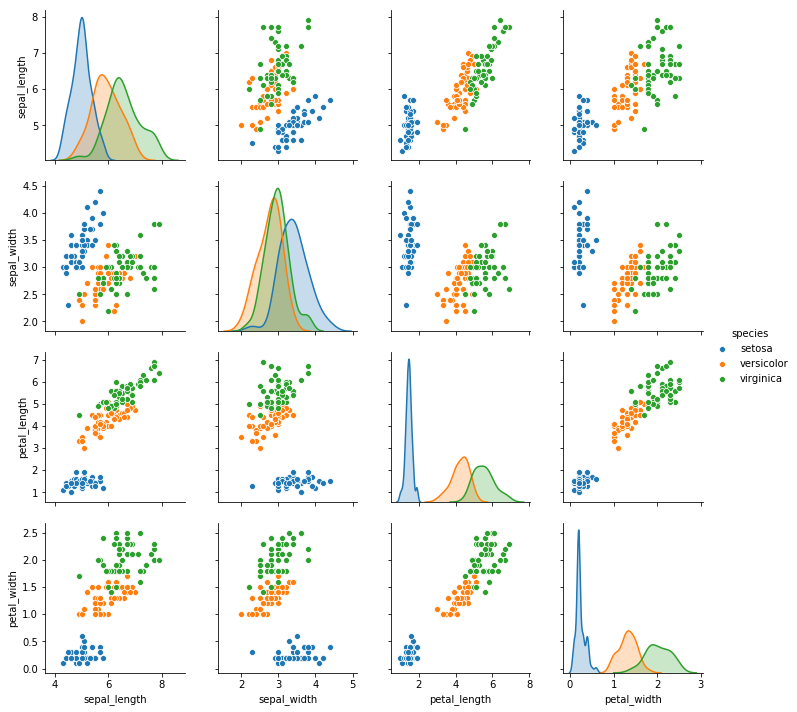

In [6]:

sns.pairplot(df.dropna(), hue='species') #this would only work if you called your dataframe df
;

### FIRST PART OF YOUR REPORT. ANALYSE AND DISCUSS THESE SUMAARY STATISTICS and THESE GRAPHS.
### What do they tell you about your data? About the relationship of the attributes, etc..

**Now, complete the following sections similar to example we did in class.**
##NOTE: The number of cells below does not mean the number of cells you need, you might complete the task with less or more cells

## EDA

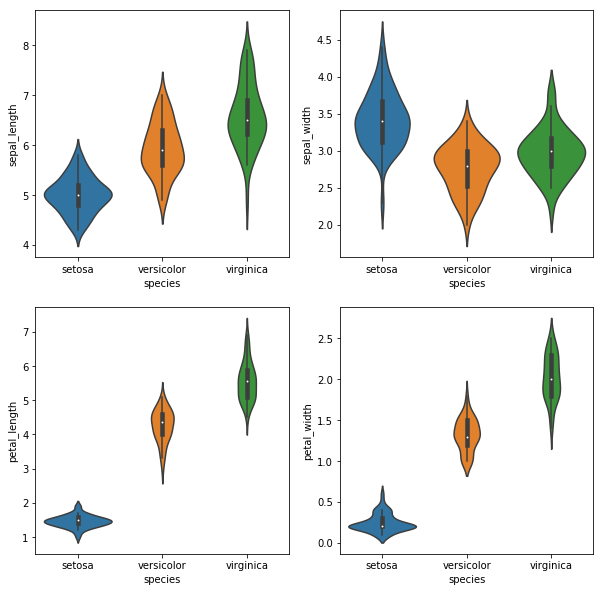

In [7]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(df):
    if column == 'species':
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.violinplot(x='species', y=column, data=df)

## Train Test Split

Let's split up the data into a training set and a test set!

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('species', axis=1)
y = df['species']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtree = DecisionTreeClassifier()

In [29]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [30]:
predictions = dtree.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.91      0.95      0.93        21
   virginica       0.91      0.83      0.87        12

   micro avg       0.93      0.93      0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [32]:
print(confusion_matrix(y_test,predictions))

[[12  0  0]
 [ 0 20  1]
 [ 0  2 10]]


In [33]:
pd.DataFrame(
    confusion_matrix(y_test, predictions),
    columns=['Predicted Setosa', 'Predicted Versicolor', 'Predicted Virginica'],
    index=['True Setosa', 'True Versicolor', 'True Virginica']
)

,Predicted Setosa,Predicted Versicolor,Predicted Virginica
True Setosa,12,0,0
True Versicolor,0,20,1
True Virginica,0,2,10


## Tree Visualization

In [34]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['sepal_width', 'petal_length', 'petal_width', 'species']

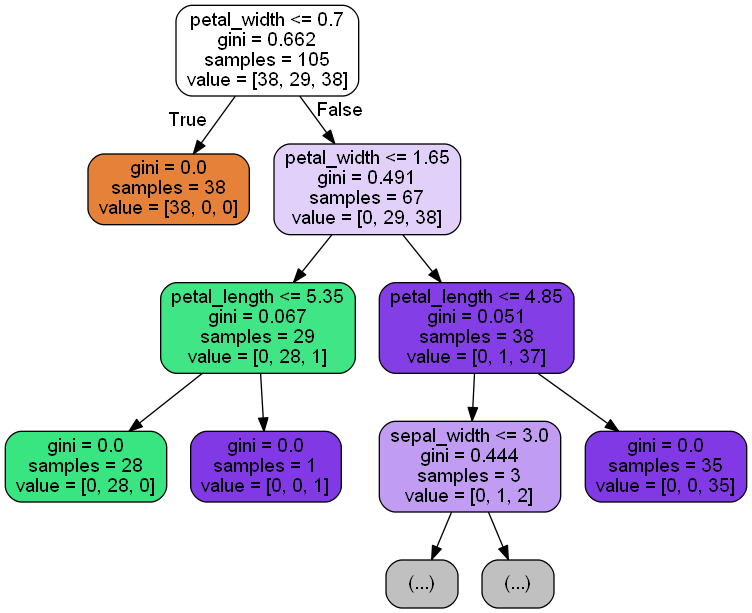

In [35]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=X.columns,filled=True,rounded=True, max_depth=3)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Improve your results

***Using different values for the parameters come with DecisionTreeClassifier() method, try to improve your results..***

### *****SECOND PART OF YOUR REPORT: ANALYSE AND DISCUSS THESE HOW YOU IMPROVED YOUR RESULTS, WHAT HELPED AND WHY?****

In [140]:
# Created a new tree to compare the previous results

X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

dtree_mod = DecisionTreeClassifier(max_depth=6)
dtree_mod.fit(X_train,y_train)

predictions = dtree_mod.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00        15

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [141]:
pd.DataFrame(
    confusion_matrix(y_test, predictions),
    columns=['Predicted Setosa', 'Predicted Versicolor', 'Predicted Virginica'],
    index=['True Setosa', 'True Versicolor', 'True Virginica']
)

,Predicted Setosa,Predicted Versicolor,Predicted Virginica
True Setosa,18,0,0
True Versicolor,0,12,0
True Virginica,0,0,15


In [147]:
CM=confusion_matrix(y_test,predictions)
#print("The accuracy of this updated test is: ", round((CM[0,0]+CM[1,1])/CM.sum(),3))

score = dtree_mod.score(X_test, y_test)
print("the accuracy of this updated method is: ", score * 100, "%")

the accuracy of this updated method is:  100.0 %


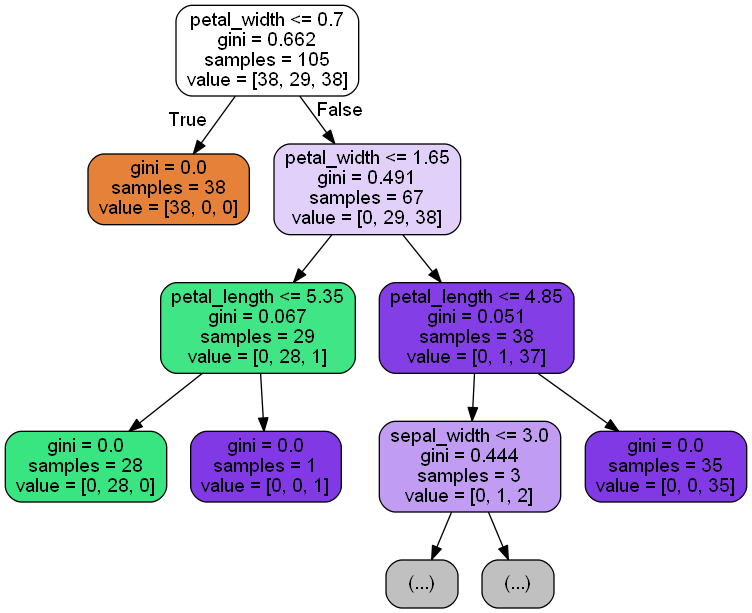

In [148]:
features = list(df.columns[1:])
features
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=X.columns,filled=True,rounded=True, max_depth=3)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  